In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib
matplotlib.rcParams['font.sans-serif']='SimHei'

In [5]:
data = pd.read_excel('optdigits-tra.xlsx',header = None) #不放置列索引
X = data.iloc[:,:64].to_numpy()
y = data.iloc[:,64].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
data_test_outer = pd.read_excel('optdigits-tes.xlsx',header = None) #不放置列索引
X_test_outer = data_test_outer.iloc[:,:64].to_numpy()
y_test_outer = data_test_outer.iloc[:,64].to_numpy()

In [7]:
# 创建随机森林分类器
rf = RandomForestClassifier(
    n_estimators=100,          # 使用 100 棵树
    max_depth=None,            # 不限制深度（可根据需要调整）
    random_state=42,           # 设置随机种子以确保结果可复现
    class_weight='balanced'    # 自动平衡类别权重
)

rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [8]:
# 预测测试集（书写者）
y_pred = rf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"测试集准确率: {accuracy:.3f}")

# 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
print("混淆矩阵:")
print(conf_matrix)

# 分类报告
class_report = classification_report(y_test, y_pred)
print("分类报告:")
print(class_report)

# 预测测试集 （非书写者）
y_pred_outer = rf.predict(X_test_outer)

# 计算准确率
accuracy_outer = accuracy_score(y_test_outer, y_pred_outer)
print(f"测试集准确率: {accuracy_outer:.3f}")

# 混淆矩阵
conf_matrix_outer = confusion_matrix(y_test_outer, y_pred_outer)
print("混淆矩阵:")
print(conf_matrix_outer)

# 分类报告
class_report_outer = classification_report(y_test_outer, y_pred_outer)
print("分类报告:")
print(class_report_outer)



测试集准确率: 0.983
混淆矩阵:
[[61  0  0  0  0  0  0  0  0  0]
 [ 0 81  0  0  0  0  0  0  0  2]
 [ 0  0 83  0  0  0  1  0  0  0]
 [ 0  0  0 93  0  3  0  0  0  0]
 [ 0  0  0  0 61  0  0  0  0  0]
 [ 0  0  0  0  0 68  0  0  0  1]
 [ 0  0  0  0  0  0 70  0  0  0]
 [ 0  0  0  1  0  0  0 95  0  0]
 [ 0  1  0  0  0  1  0  0 64  0]
 [ 0  0  0  0  1  0  0  1  1 76]]
分类报告:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       0.99      0.98      0.98        83
           2       1.00      0.99      0.99        84
           3       0.99      0.97      0.98        96
           4       0.98      1.00      0.99        61
           5       0.94      0.99      0.96        69
           6       0.99      1.00      0.99        70
           7       0.99      0.99      0.99        96
           8       0.98      0.97      0.98        66
           9       0.96      0.96      0.96        79

    accuracy                           0.98    

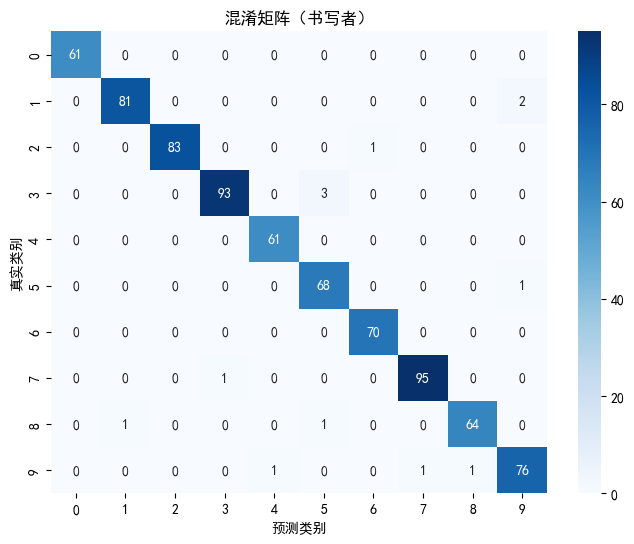

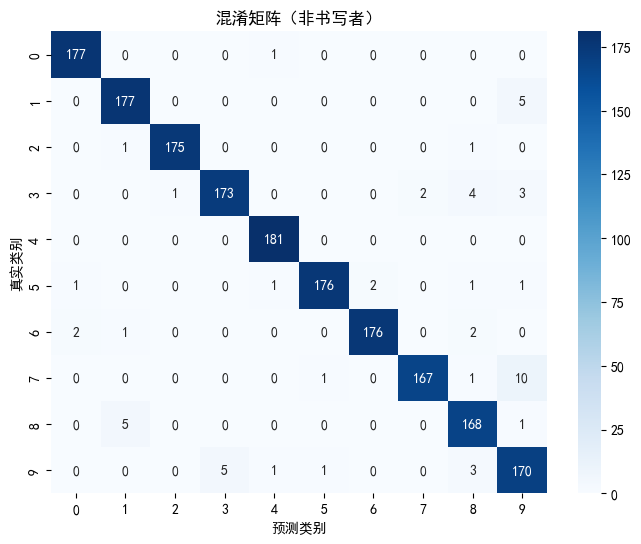

In [14]:
# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("混淆矩阵（书写者）")
plt.xlabel("预测类别")
plt.ylabel("真实类别")
plt.show()

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_outer, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("混淆矩阵（非书写者）")
plt.xlabel("预测类别")
plt.ylabel("真实类别")
plt.show()